In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

In [2]:
# Load dataset from folders
def load_dataset(dataset_path):
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
    train_path = os.path.join(desktop_path, dataset_path, 'Train')
    validation_path = os.path.join(desktop_path, dataset_path, 'Validation')
    test_path = os.path.join(desktop_path, dataset_path, 'Test')

    train_data, train_labels = load_images_from_folder(train_path)
    validation_data, validation_labels = load_images_from_folder(validation_path)
    test_data, test_labels = load_images_from_folder(test_path)

    return train_data, train_labels, validation_data, validation_labels, test_data, test_labels

def load_images_from_folder(folder):
    data = []
    labels = []
    classes = os.listdir(folder)
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:  # Check if the image was successfully read
                image = cv2.resize(image, (128, 128))  # Resize images to a fixed size
                data.append(image)
                labels.append(class_name)
            else:
                print(f"Failed to read image: {image_path}")
    return np.array(data), np.array(labels)

In [3]:
# Preprocess dataset
def preprocess_dataset(data, labels):
    data = data.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    label_binarizer = LabelBinarizer()
    labels = label_binarizer.fit_transform(labels)
    return data, labels

# Load and preprocess dataset
dataset_folder_name = 'plant_dataset'
train_data, train_labels, validation_data, validation_labels, test_data, test_labels = load_dataset(dataset_folder_name)
train_data, train_labels = preprocess_dataset(train_data, train_labels)
validation_data, validation_labels = preprocess_dataset(validation_data, validation_labels)
test_data, test_labels = preprocess_dataset(test_data, test_labels)



In [5]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Update to match the number of classes in your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(validation_data, validation_labels))

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 586ms/step - accuracy: 0.4009 - loss: 1.0708 - val_accuracy: 0.5833 - val_loss: 0.8123
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 661ms/step - accuracy: 0.6880 - loss: 0.6554 - val_accuracy: 0.7333 - val_loss: 0.6145
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 660ms/step - accuracy: 0.8110 - loss: 0.4590 - val_accuracy: 0.7500 - val_loss: 0.5812
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 687ms/step - accuracy: 0.9155 - loss: 0.2582 - val_accuracy: 0.8333 - val_loss: 0.4963
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 644ms/step - accuracy: 0.9131 - loss: 0.2407 - val_accuracy: 0.8000 - val_loss: 0.5278
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 701ms/step - accuracy: 0.9312 - loss: 0.1979 - val_accuracy: 0.9000 - val_loss: 0.3018
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 747ms/step - accuracy: 0.9686 - loss: 0.0853 - val_accuracy: 0.9167 - val_loss: 0.2420
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 729ms/step - accuracy: 0.9741 - loss: 0.0889 - val_accu

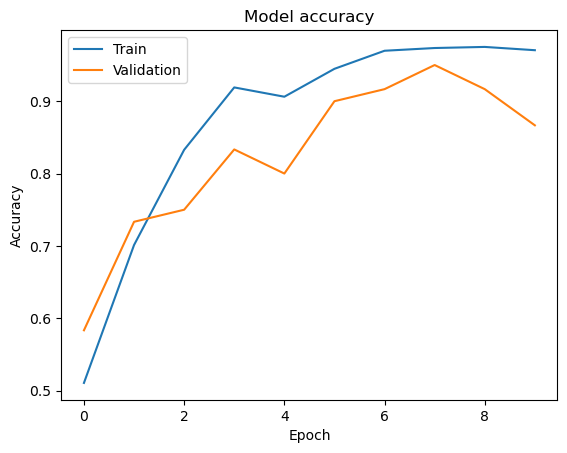

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


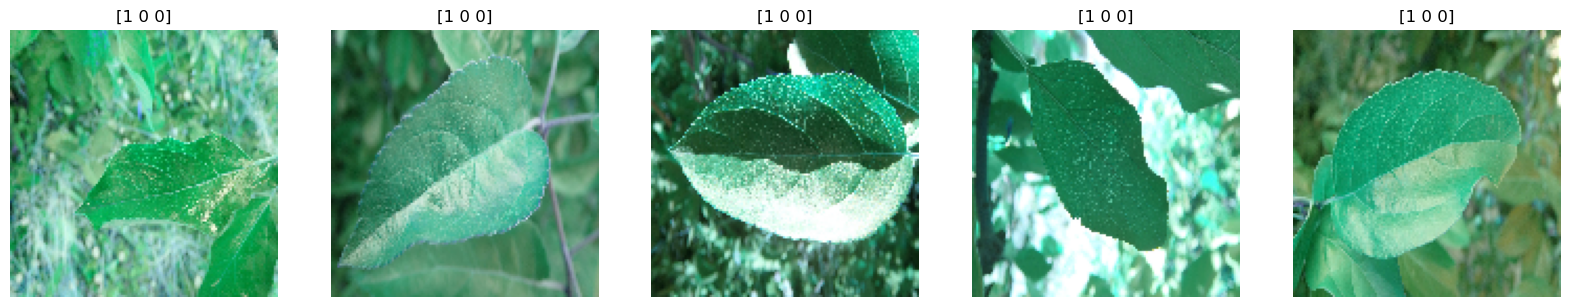

In [7]:
import matplotlib.pyplot as plt

# Define a function to display images
def show_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 10))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Display some images from the dataset
num_images_to_display = 5
show_images(train_data, train_labels, num_images_to_display)
